# Read Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


In [2]:
dffruit = pd.read_excel('fruit.xlsx')

In [3]:
dffruit['name'].unique()

array(['orange', 'grapefruit'], dtype=object)

In [4]:
dffruit.describe()

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


In [5]:
dffruit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   diameter  10000 non-null  float64
 1   weight    10000 non-null  float64
 2   red       10000 non-null  int64  
 3   green     10000 non-null  int64  
 4   blue      10000 non-null  int64  
 5   name      10000 non-null  object 
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [6]:
print("data shape : ",dffruit.shape)

data shape :  (10000, 6)


In [7]:
dffruit.name.value_counts()

name
orange        5000
grapefruit    5000
Name: count, dtype: int64

# Cleaning Data

In [8]:
dffruit.isnull().sum()

diameter    0
weight      0
red         0
green       0
blue        0
name        0
dtype: int64

In [9]:
dffruit.duplicated().sum()

0

# Exploratory Data Analysis (EDA)

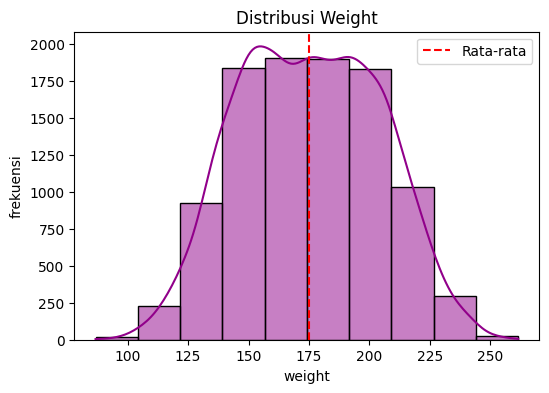

In [10]:
plt.figure(figsize=(6,4))
sns.histplot(data=dffruit, x='weight', bins=10, kde= True, color= '#91008a') #menggunakan inisialsiasi visual histogram plot
plt.axvline(dffruit['weight'].mean(), color='red', linestyle='--', label='Rata-rata')
plt.legend()

plt.title('Distribusi Weight')
plt.xlabel('weight')
plt.ylabel('frekuensi')
plt.show()

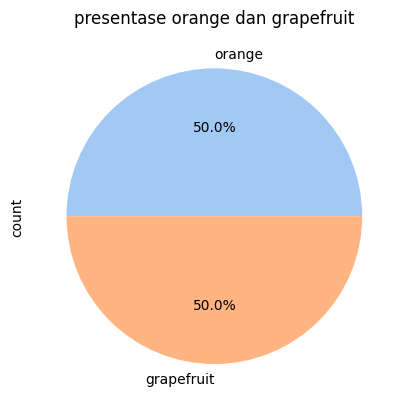

In [11]:
sns.set_palette('pastel')
dffruit['name'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('presentase orange dan grapefruit')
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_11936\2144723206.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dffruit, x='name', palette='rocket')


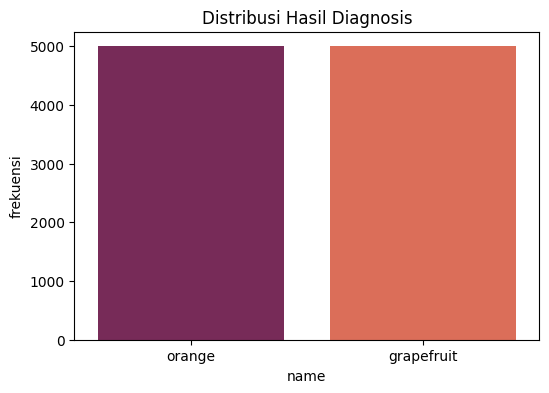

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(data=dffruit, x='name', palette='rocket')

plt.title('Distribusi Hasil Diagnosis')
plt.xlabel('name')
plt.ylabel('frekuensi')
plt.show()

# Membuat Data Training

In [13]:
x = dffruit.drop(columns=['name'])
y = dffruit['name']

print("x:",x.shape)
print("y:",y.shape)

x: (10000, 5)
y: (10000,)


# Feature Scaling

In [14]:
scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.fit_transform(x)

In [15]:
y = dffruit['name'].values
le = LabelEncoder().fit(y)
y = le.transform(y)
y

array([1, 1, 1, ..., 0, 0, 0])

# Split Train Test

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Modeling

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# List kernel yang akan diuji
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
# Dictionary untuk menyimpan hasil akurasi
results = {}
# Melatih model SVM dengan berbagai kernel
for kernel in kernels:
    clf = SVC(kernel=kernel)
    clf.fit(x_train, y_train)

    # Prediksi
    y_pred = clf.predict(x_test)

    # Evaluasi akurasi
    clf_acc = accuracy_score(y_test, y_pred)
    results[kernel] = clf_acc

    # Print classification report untuk kernel ini
    print(f"\nKernel: {kernel}")
    print(classification_report(y_test, y_pred))
    print("Akurasi SVM ({}): {:.2f}%".format(kernel, clf_acc * 100))

# Menentukan kernel terbaik
best_kernel = max(results, key=results.get)
print("\nKernel terbaik adalah '{}' dengan akurasi {:.2f}%".format(best_kernel, results[best_kernel] * 100))



Kernel: linear
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       988
           1       0.94      0.93      0.93      1012

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000

Akurasi SVM (linear): 93.20%

Kernel: poly
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       988
           1       0.99      0.93      0.96      1012

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000

Akurasi SVM (poly): 95.95%

Kernel: rbf
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       988
           1       0.94      0.92      0.93      1012

    accuracy                           0.93      2000
   macro avg       0.93      

Untuk Kelas 0:

Precision = 0.88 → Dari semua prediksi kelas 0, 88% di antaranya benar-benar kelas 0.
Recall = 0.94 → Dari semua sampel aktual kelas 0, 94% di antaranya berhasil diprediksi dengan benar sebagai kelas 0.
F1-Score = 0.91 → Kombinasi dari Precision dan Recall.
Support = 50 → Ada 50 contoh aktual dari kelas 0.
Untuk Kelas 1:

Precision = 0.85 → Dari semua prediksi kelas 1, 85% di antaranya benar-benar kelas 1.
Recall = 0.76 → Dari semua sampel aktual kelas 1, 76% di antaranya berhasil diprediksi dengan benar sebagai kelas 1.
F1-Score = 0.80 → Kombinasi dari Precision dan Recall.
Support = 70 → Ada 70 contoh aktual dari kelas 1.

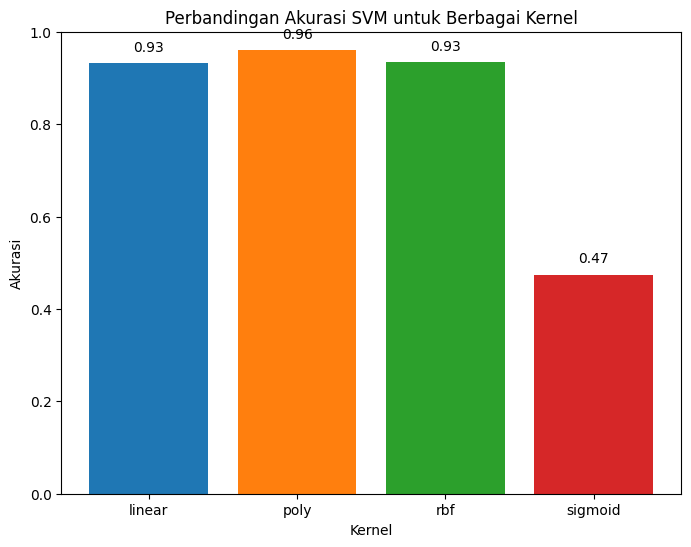

In [18]:
# Visualisasi hasil akurasi untuk setiap kernel
plt.figure(figsize=(8, 6))
plt.bar(results.keys(), results.values(), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

# Tambahkan judul dan label
plt.title('Perbandingan Akurasi SVM untuk Berbagai Kernel')
plt.xlabel('Kernel')
plt.ylabel('Akurasi')
plt.ylim(0, 1)  # Batasi sumbu y dari 0 ke 1 (akurasi dalam skala 0-1)

# Tambahkan nilai akurasi di atas setiap bar
for kernel, acc in results.items():
    plt.text(kernel, acc + 0.02, f"{acc:.2f}", ha='center', va='bottom', fontsize=10)

# Tampilkan visualisasi
plt.show()


In [19]:
from sklearn.model_selection import GridSearchCV


parameters ={
    'kernel' : ['rbf','poly','sigmoid','linear'],
    'C' : [0.5, 1, 10, 100],
    'gamma' : ['scale', 1, 0.1, 0.01, 0.001]}

grid_search = GridSearchCV(estimator=SVC(random_state=0),
                           param_grid=parameters,
                           n_jobs=6,#6 tread pada processor 
                           verbose=1,#untuk mendapatkan feedback yang informatif
                           scoring='accuracy') # untuk nilai perbandingan

grid_search.fit(x_train, y_train)


Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(estimator=SVC(random_state=0), n_jobs=6,
             param_grid={'C': [0.5, 1, 10, 100],
                         'gamma': ['scale', 1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             scoring='accuracy', verbose=1)

In [20]:
print(f'Best Score : {grid_search.best_score_}')

best_params = grid_search.best_estimator_.get_params()
print(f'Best Parameter')
for param in parameters:
    print(f'\t{param} : {best_params[param]}') 


Best Score : 0.970125
Best Parameter
	kernel : rbf
	C : 100
	gamma : scale


In [21]:
y_pred = clf.predict(x_test)
y_pred

array([1, 1, 0, ..., 1, 1, 1])

In [22]:
# Normalisasi data dan reduksi dimensi dengan PCA
scaler = StandardScaler()
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaler.fit_transform(x))


In [23]:
# Latih model SVM
svm = SVC(kernel='rbf', C=100, gamma='scale')
svm.fit(X_pca, y)


SVC(C=100)

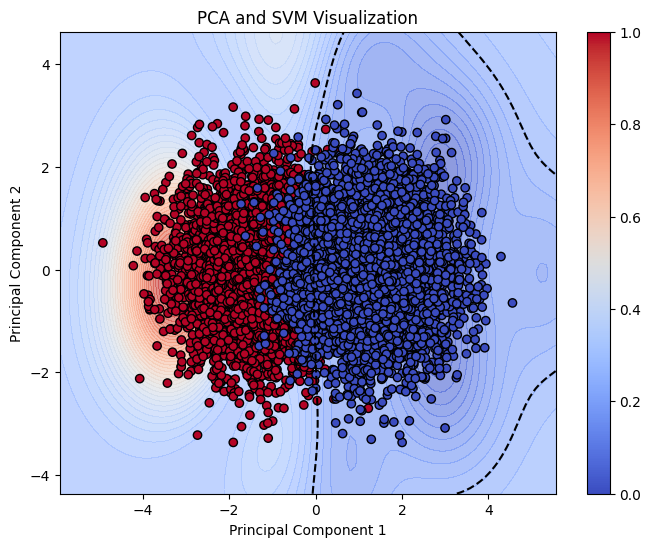

In [24]:
# Membuat grid untuk visualisasi decision boundary
xx, yy = np.meshgrid(
    np.linspace(X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1, 100),
    np.linspace(X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1, 100)
)
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot data dan decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 50), cmap='coolwarm', alpha=0.6)
plt.contour(xx, yy, Z, levels=[0], colors='black', linestyles='--')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA and SVM Visualization')
plt.colorbar()
plt.show()


# Testing Data Baru

In [25]:
new_data = {'diameter' : [3],
            'weight' : [86],
            'red' : [172],
            'green' : [85],
            'blue' : [25]}
new_data = pd.DataFrame(new_data)
new_data

,diameter,weight,red,green,blue
0,3,86,172,85,25


In [26]:
scaled_new_data = scaler.transform(new_data)
y_pred_new = clf.predict(scaled_new_data)
inevers = le.inverse_transform(y_pred_new)

print("hasil data baru : ", inevers)

hasil data baru :  ['orange']


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


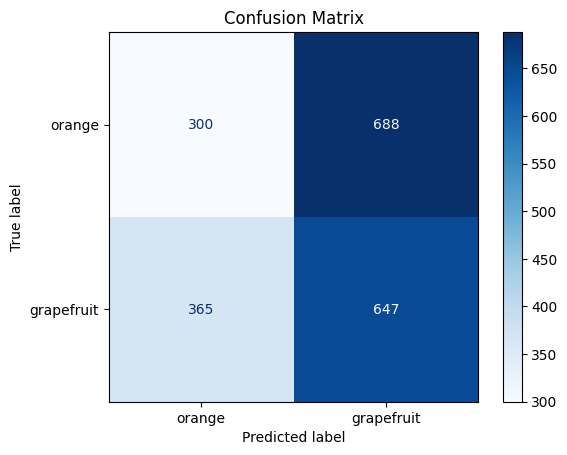

In [27]:
cm = confusion_matrix(y_test, y_pred)

labels = ['orange','grapefruit']

# Tampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [28]:
import pickle
fw = open('fruitsvm.pkl', 'wb')
pickle.dump(grid_search , fw)